<a href="https://colab.research.google.com/github/Celinekimm/MachineLearning/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image

np.set_printoptions(suppress=True)

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()

In [ ]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [ ]:
df['MEDV'] = data['target']

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

In [ ]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [ ]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
189,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
409,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78
210,0.17446,0.0,10.59,1.0,0.489,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27


In [ ]:
y_train.head()

436     9.6
189    34.9
16     23.1
409    27.5
210    21.7
Name: MEDV, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

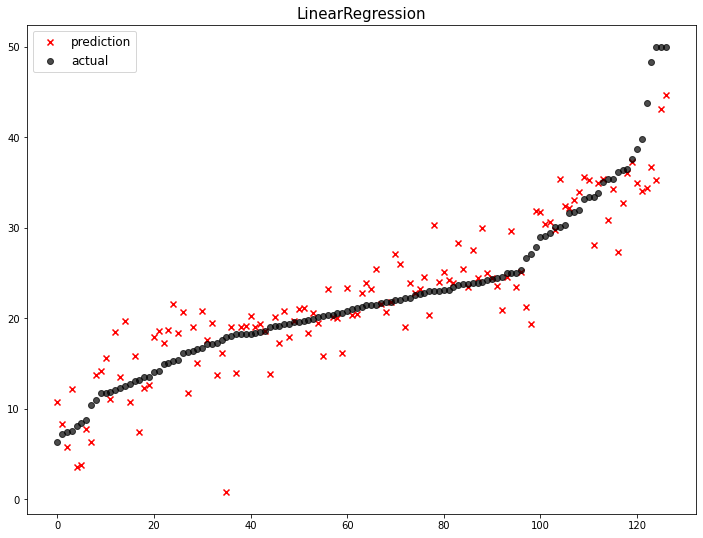

              model       mse
0  LinearRegression  15.86072


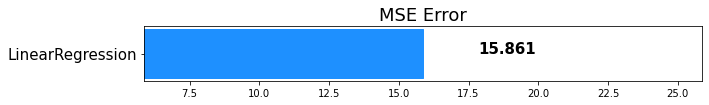

In [ ]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

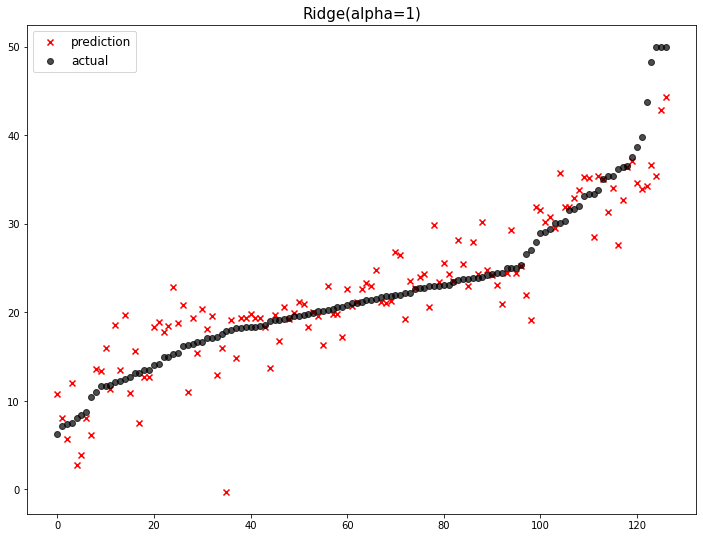

              model        mse
0    Ridge(alpha=1)  16.177261
1  LinearRegression  15.860720


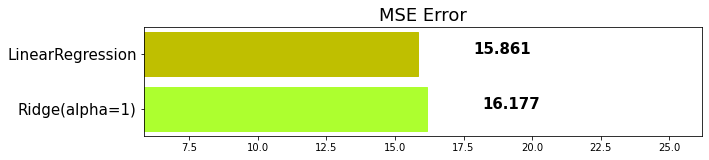

In [ ]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

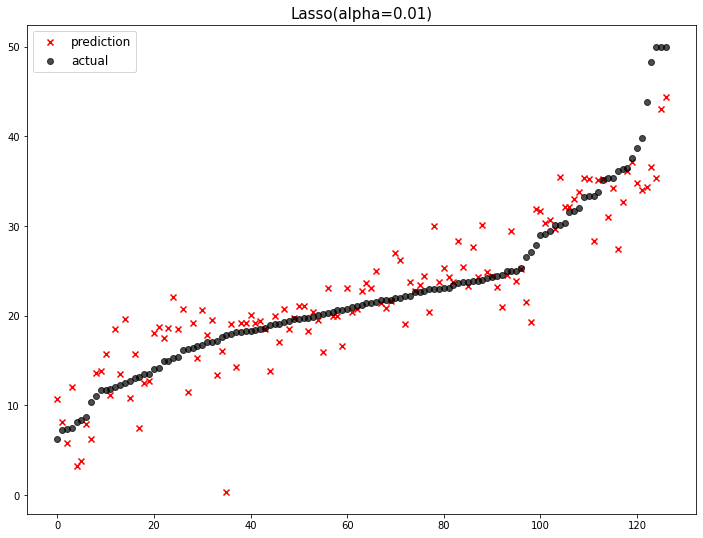

               model        mse
0     Ridge(alpha=1)  16.177261
1  Lasso(alpha=0.01)  15.937363
2   LinearRegression  15.860720


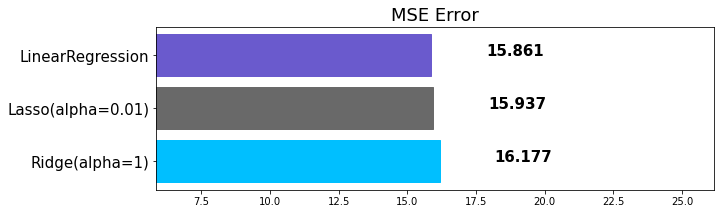

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

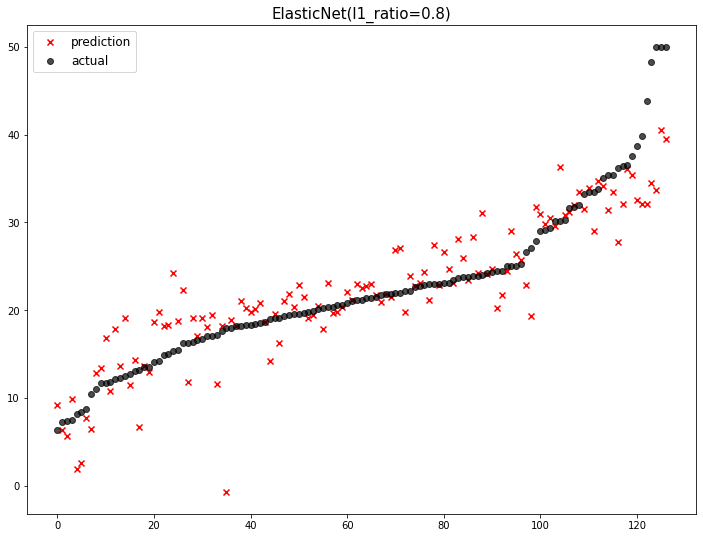

                      model        mse
0  ElasticNet(l1_ratio=0.8)  18.820036
1            Ridge(alpha=1)  16.177261
2         Lasso(alpha=0.01)  15.937363
3          LinearRegression  15.860720


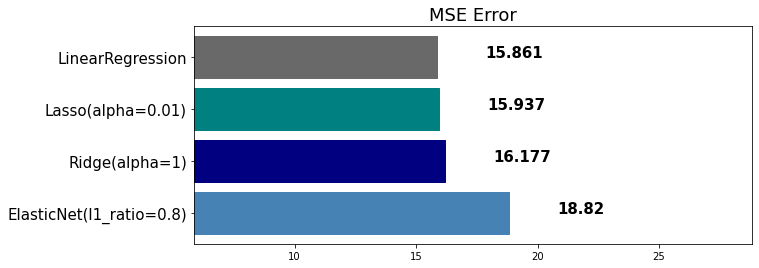

In [ ]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.8)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.8)', pred, y_test)   

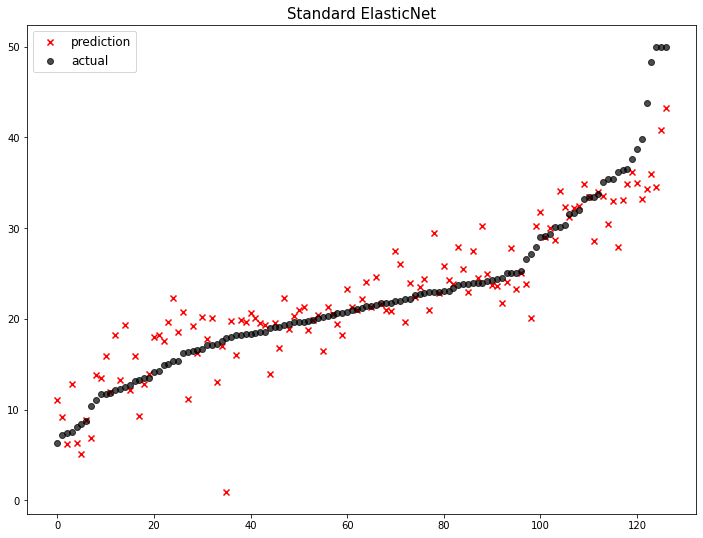

                      model        mse
0  ElasticNet(l1_ratio=0.8)  18.820036
1            Ridge(alpha=1)  16.177261
2         Lasso(alpha=0.01)  15.937363
3          LinearRegression  15.860720
4       Standard ElasticNet  15.329625


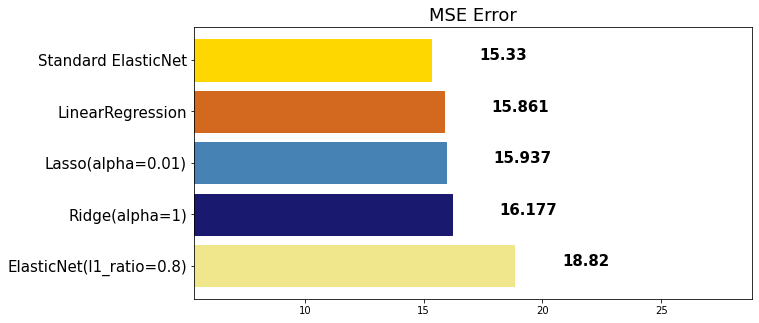

In [ ]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.246100192725862, tolerance: 3.243503683377308
  positive)


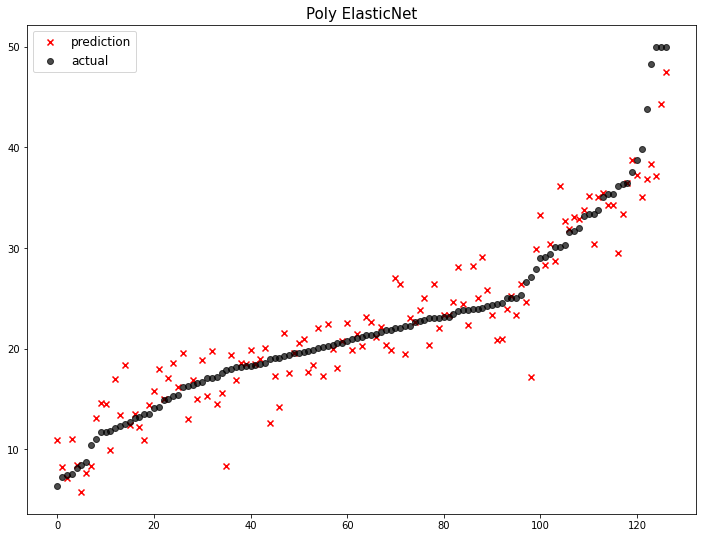

                      model        mse
0  ElasticNet(l1_ratio=0.8)  18.820036
1            Ridge(alpha=1)  16.177261
2         Lasso(alpha=0.01)  15.937363
3          LinearRegression  15.860720
4       Standard ElasticNet  15.329625
5           Poly ElasticNet   9.872081


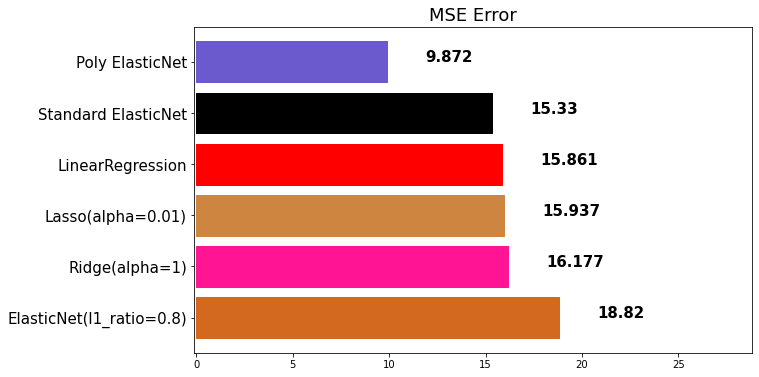

In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

In [ ]:
# Voting Ensemble
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [ ]:
single_models = [('linear_reg', linear_reg),
                 ('ridge', ridge),
                 ('lasso', lasso),
                 ('elasticnet_pipeline', elasticnet_pipeline),
                 ('poly_pipeline', poly_pipeline)
                 ]

In [ ]:
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [ ]:
voting_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('linear_reg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=-1, normalize=False)),
                            ('ridge',
                             Ridge(alpha=1, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001)),
                            ('lasso',
                             Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, pr...
                                                                 interaction_only=False,
                                                                 order='C')),
                                             ('standardscaler',
                              

In [ ]:
voting_pred = voting_regressor.predict(x_test)

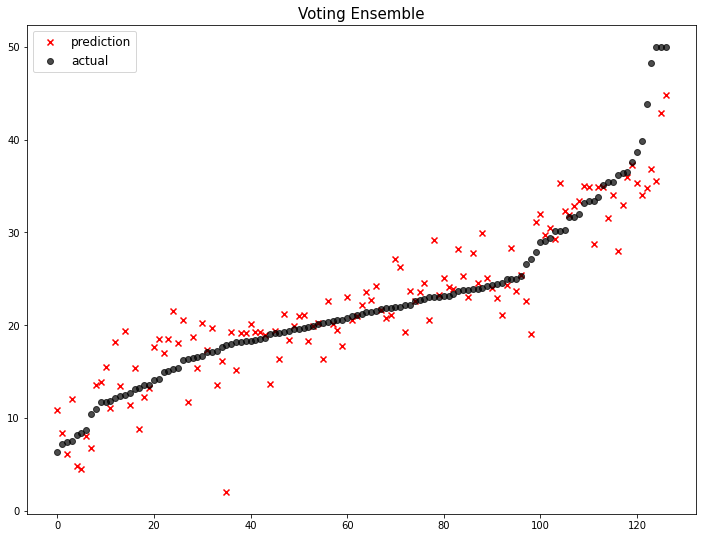

                      model        mse
0  ElasticNet(l1_ratio=0.8)  18.820036
1            Ridge(alpha=1)  16.177261
2         Lasso(alpha=0.01)  15.937363
3          LinearRegression  15.860720
4       Standard ElasticNet  15.329625
5           Voting Ensemble  14.006872
6           Poly ElasticNet   9.872081


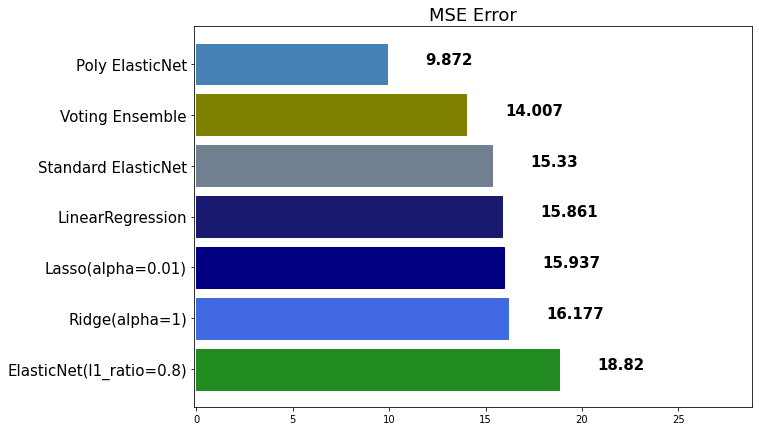

In [ ]:
mse_eval('Voting Ensemble', voting_pred, y_test)

In [ ]:
# Bagging(Bootstrap Aggregating) - RandomForest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

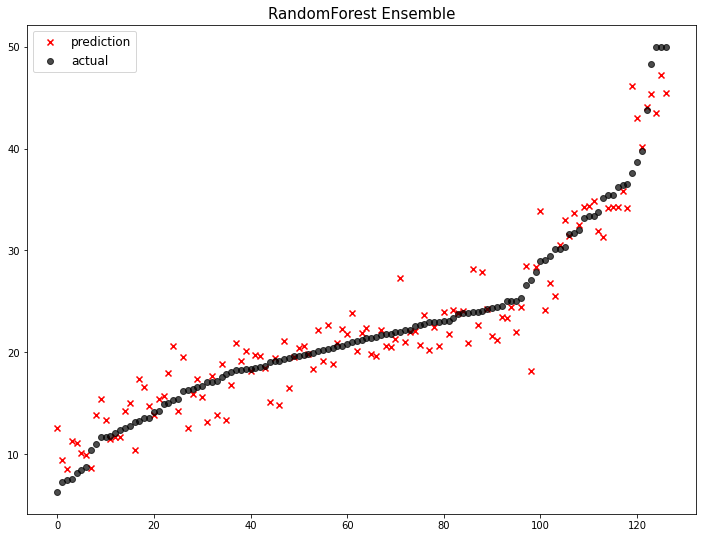

                      model        mse
0  ElasticNet(l1_ratio=0.8)  18.820036
1            Ridge(alpha=1)  16.177261
2         Lasso(alpha=0.01)  15.937363
3          LinearRegression  15.860720
4       Standard ElasticNet  15.329625
5           Voting Ensemble  14.006872
6           Poly ElasticNet   9.872081
7     RandomForest Ensemble   6.854852


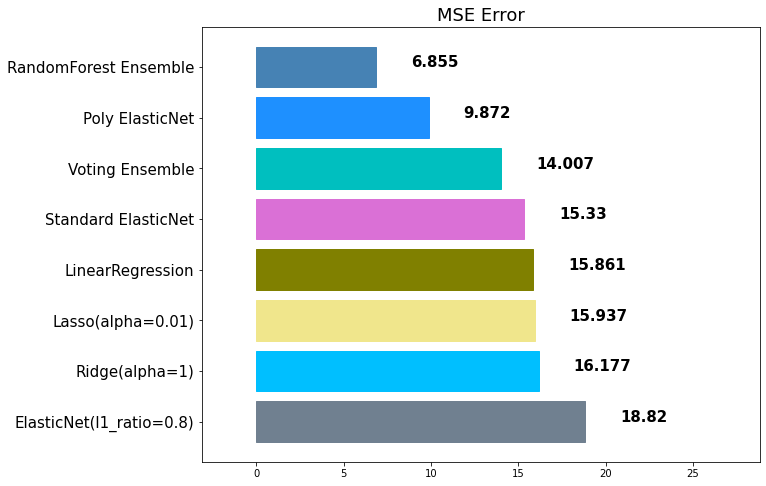

In [ ]:
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble', rfr_pred, y_test)

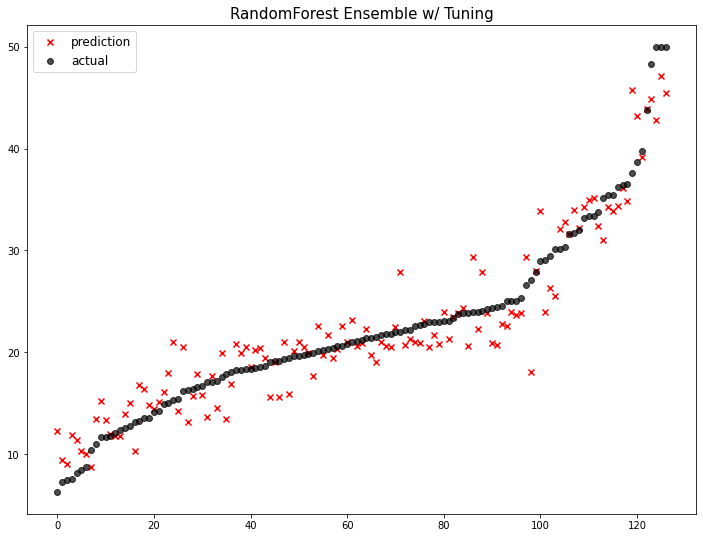

                             model        mse
0         ElasticNet(l1_ratio=0.8)  18.820036
1                   Ridge(alpha=1)  16.177261
2                Lasso(alpha=0.01)  15.937363
3                 LinearRegression  15.860720
4              Standard ElasticNet  15.329625
5                  Voting Ensemble  14.006872
6                  Poly ElasticNet   9.872081
7  RandomForest Ensemble w/ Tuning   7.249051
8            RandomForest Ensemble   6.854852


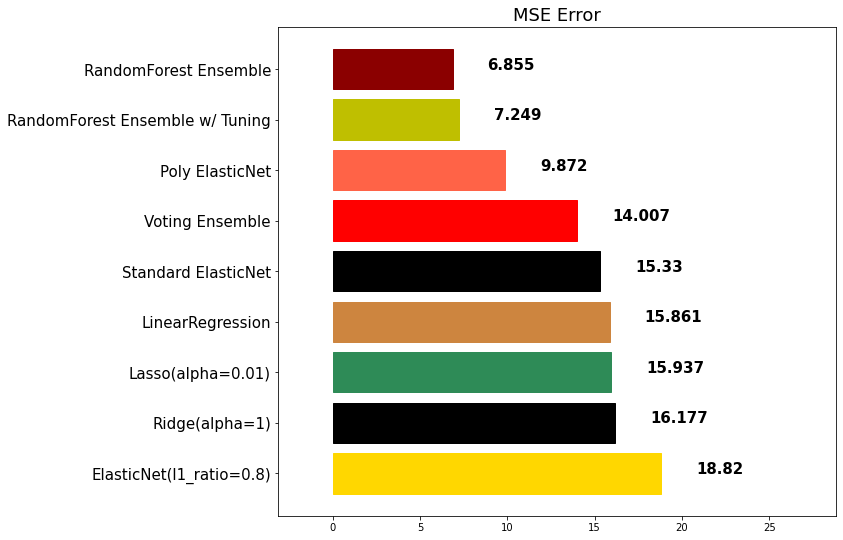

In [ ]:
rfr = RandomForestRegressor(random_state=42, n_estimators=1000, max_depth=7, max_features=0.8)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble w/ Tuning', rfr_pred, y_test)

In [ ]:
# Boosting
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

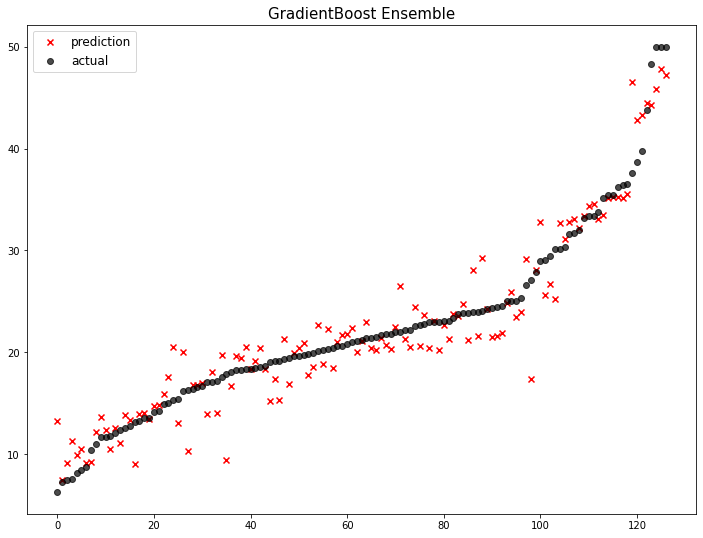

                             model        mse
0         ElasticNet(l1_ratio=0.8)  18.820036
1                   Ridge(alpha=1)  16.177261
2                Lasso(alpha=0.01)  15.937363
3                 LinearRegression  15.860720
4              Standard ElasticNet  15.329625
5                  Voting Ensemble  14.006872
6                  Poly ElasticNet   9.872081
7  RandomForest Ensemble w/ Tuning   7.249051
8            RandomForest Ensemble   6.854852
9           GradientBoost Ensemble   6.767948


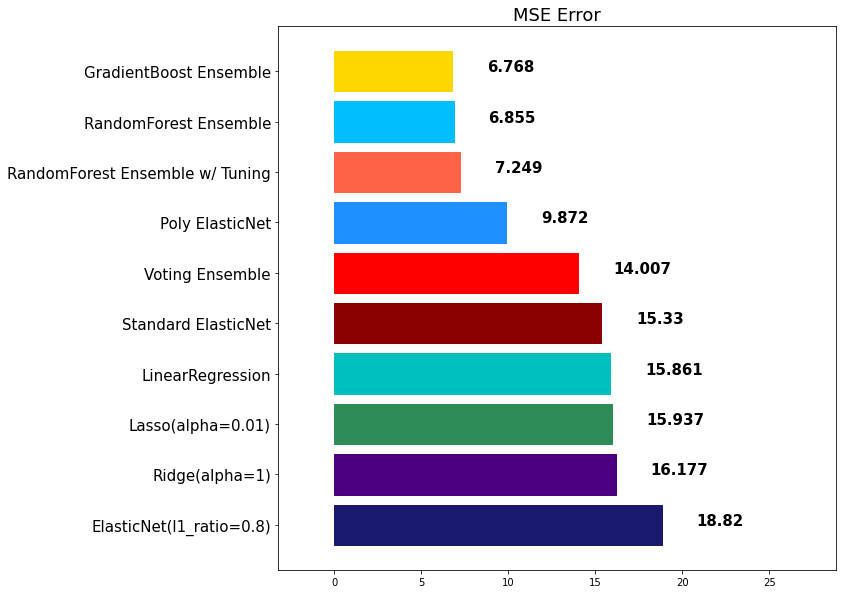

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble', gbr_pred, y_test)

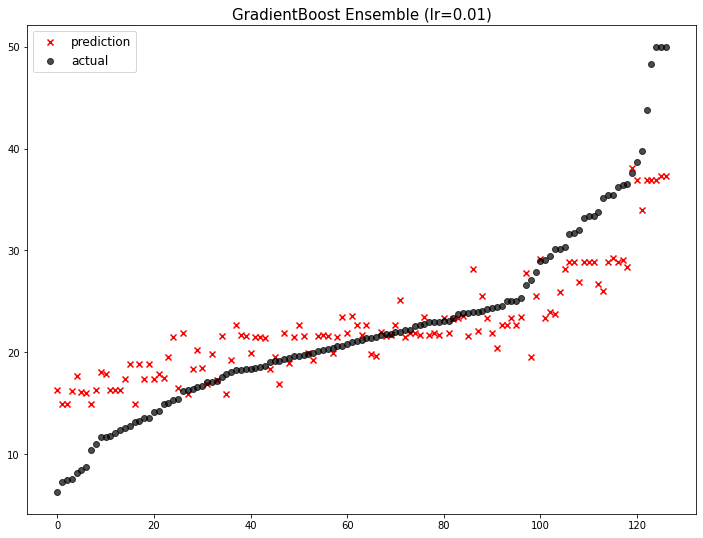

                               model        mse
0   GradientBoost Ensemble (lr=0.01)  20.445865
1           ElasticNet(l1_ratio=0.8)  18.820036
2                     Ridge(alpha=1)  16.177261
3                  Lasso(alpha=0.01)  15.937363
4                   LinearRegression  15.860720
5                Standard ElasticNet  15.329625
6                    Voting Ensemble  14.006872
7                    Poly ElasticNet   9.872081
8    RandomForest Ensemble w/ Tuning   7.249051
9              RandomForest Ensemble   6.854852
10            GradientBoost Ensemble   6.767948


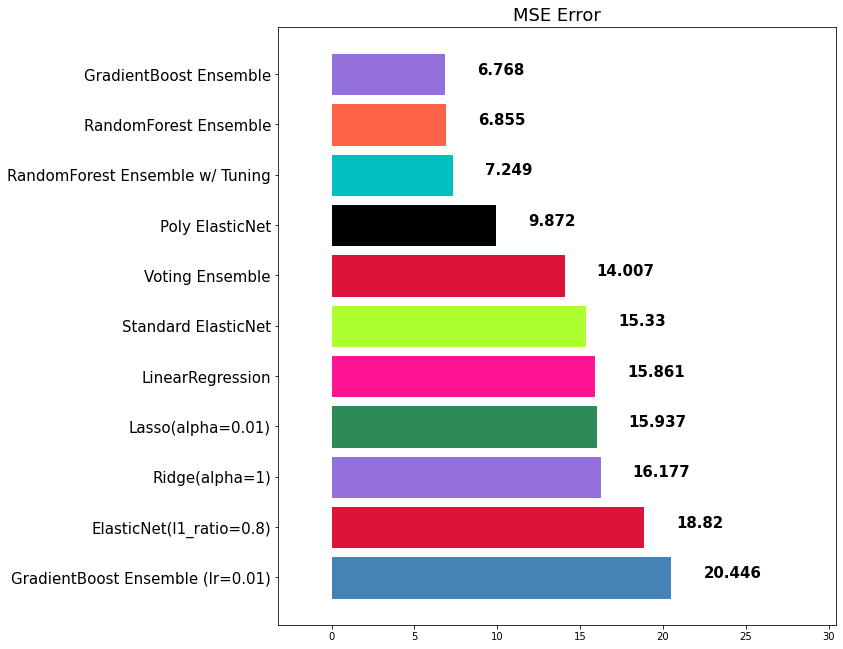

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble (lr=0.01)', gbr_pred, y_test)

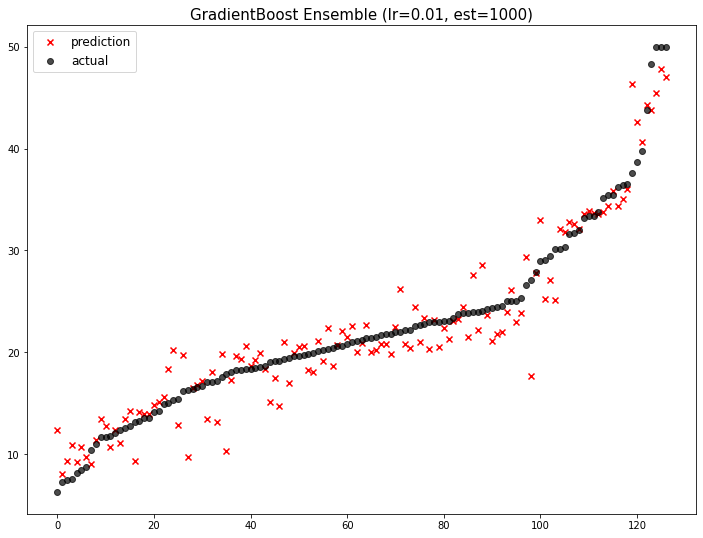

                                         model        mse
0             GradientBoost Ensemble (lr=0.01)  20.445865
1                     ElasticNet(l1_ratio=0.8)  18.820036
2                               Ridge(alpha=1)  16.177261
3                            Lasso(alpha=0.01)  15.937363
4                             LinearRegression  15.860720
5                          Standard ElasticNet  15.329625
6                              Voting Ensemble  14.006872
7                              Poly ElasticNet   9.872081
8              RandomForest Ensemble w/ Tuning   7.249051
9                        RandomForest Ensemble   6.854852
10                      GradientBoost Ensemble   6.767948
11  GradientBoost Ensemble (lr=0.01, est=1000)   6.465432


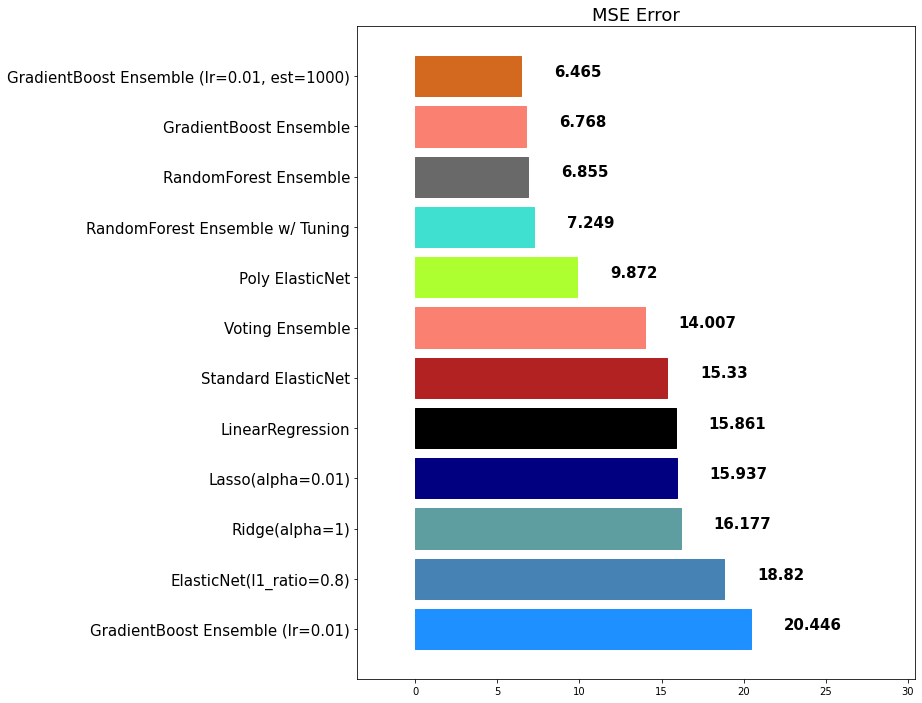

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble (lr=0.01, est=1000)', gbr_pred, y_test)

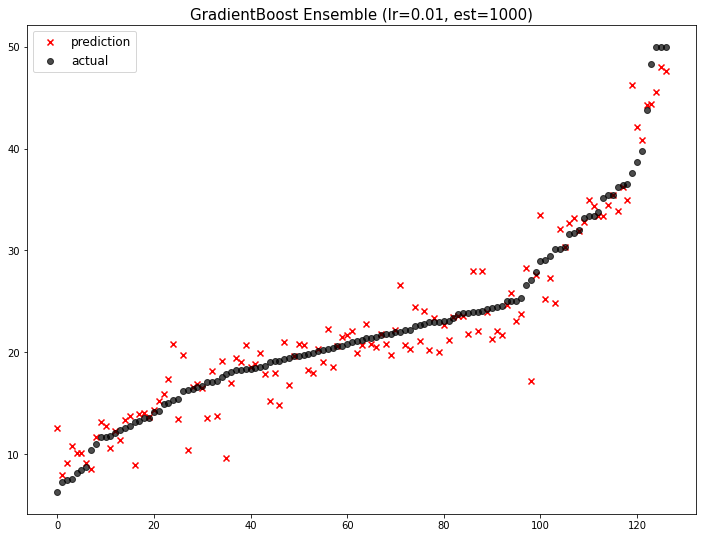

                                         model        mse
0             GradientBoost Ensemble (lr=0.01)  20.445865
1                     ElasticNet(l1_ratio=0.8)  18.820036
2                               Ridge(alpha=1)  16.177261
3                            Lasso(alpha=0.01)  15.937363
4                             LinearRegression  15.860720
5                          Standard ElasticNet  15.329625
6                              Voting Ensemble  14.006872
7                              Poly ElasticNet   9.872081
8              RandomForest Ensemble w/ Tuning   7.249051
9                        RandomForest Ensemble   6.854852
10                      GradientBoost Ensemble   6.767948
11  GradientBoost Ensemble (lr=0.01, est=1000)   6.393709


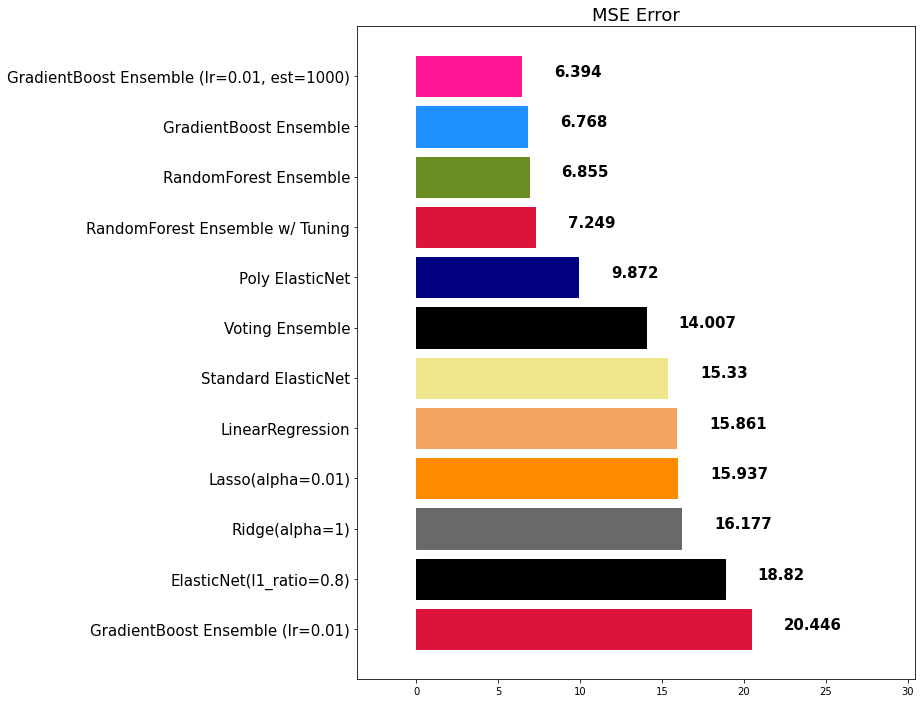

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble (lr=0.01, est=1000)', gbr_pred, y_test)

In [ ]:
# XGBoost (eXtreme Gradient Boosting)
from xgboost import XGBRegressor

[08:24:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


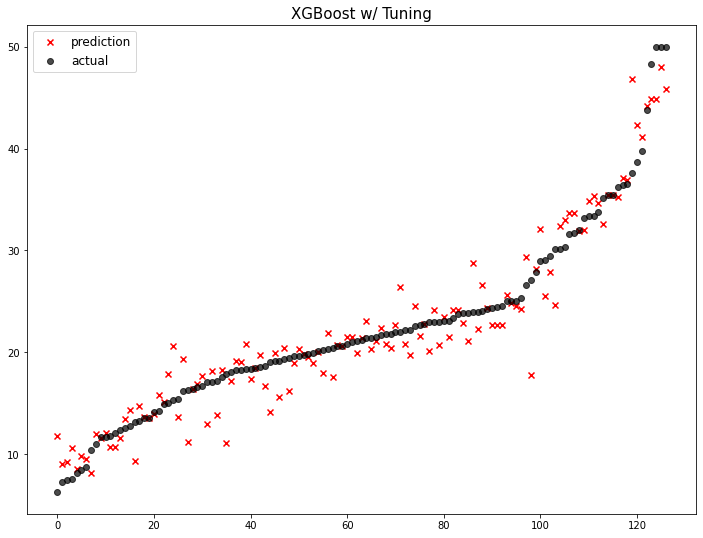

                                                model        mse
0                    GradientBoost Ensemble (lr=0.01)  20.445865
1                            ElasticNet(l1_ratio=0.8)  18.820036
2                                      Ridge(alpha=1)  16.177261
3                                   Lasso(alpha=0.01)  15.937363
4                                    LinearRegression  15.860720
5                                 Standard ElasticNet  15.329625
6                                     Voting Ensemble  14.006872
7                                     Poly ElasticNet   9.872081
8                     RandomForest Ensemble w/ Tuning   7.249051
9          GradientBoost Ensemble (lr=0.01, est=1000)   6.912576
10                              RandomForest Ensemble   6.854852
11                             GradientBoost Ensemble   6.767948
12  GradientBoost Ensemble (lr=0.01, est=1000, sub...   6.093492
13                                  XGBoost w/ Tuning   6.093492


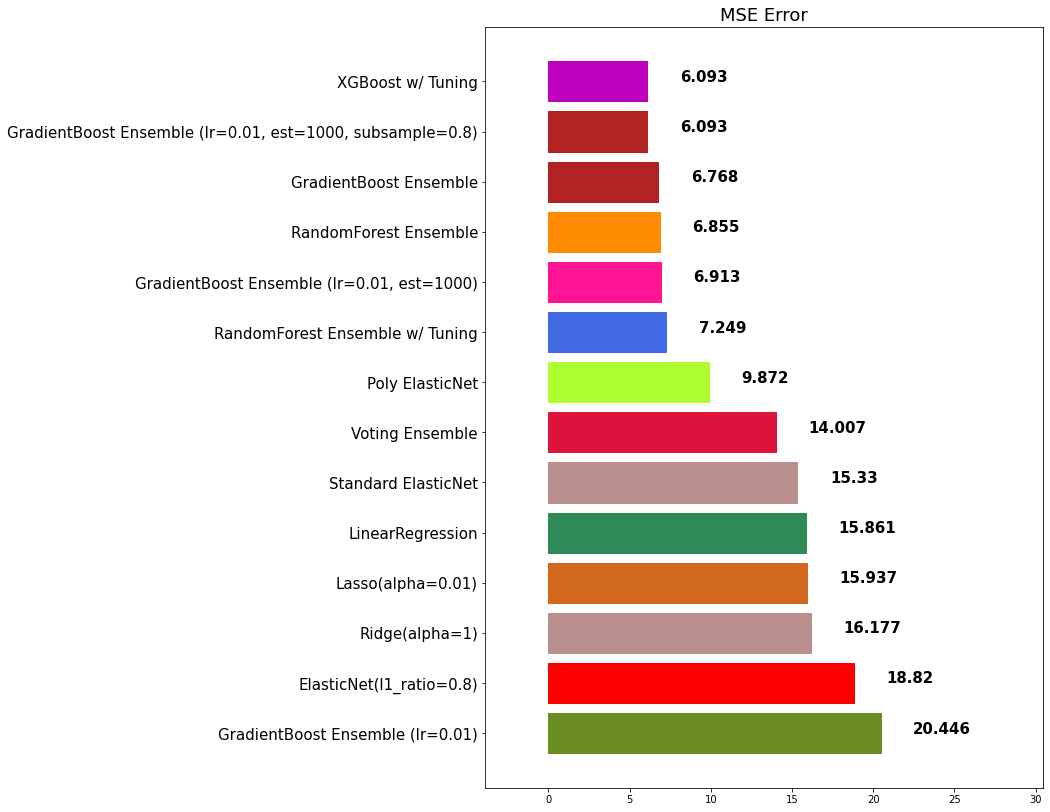

In [ ]:
xgb = XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8, max_features=0.8, max_depth=7)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost w/ Tuning', xgb_pred, y_test)

In [ ]:
# LightGBM
from lightgbm import LGBMRegressor

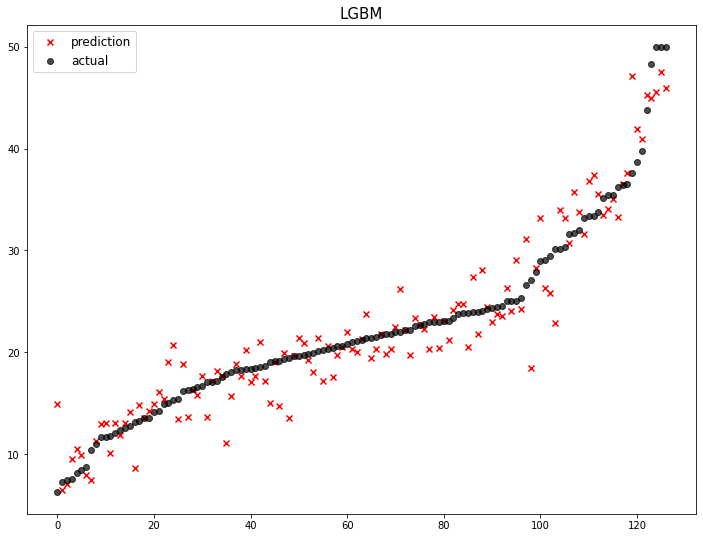

                                                model        mse
0                    GradientBoost Ensemble (lr=0.01)  20.445865
1                            ElasticNet(l1_ratio=0.8)  18.820036
2                                      Ridge(alpha=1)  16.177261
3                                   Lasso(alpha=0.01)  15.937363
4                                    LinearRegression  15.860720
5                                 Standard ElasticNet  15.329625
6                                     Voting Ensemble  14.006872
7                                     Poly ElasticNet   9.872081
8                                                LGBM   7.429085
9                     RandomForest Ensemble w/ Tuning   7.249051
10         GradientBoost Ensemble (lr=0.01, est=1000)   6.912576
11                              RandomForest Ensemble   6.854852
12                             GradientBoost Ensemble   6.767948
13  GradientBoost Ensemble (lr=0.01, est=1000, sub...   6.093492
14                       

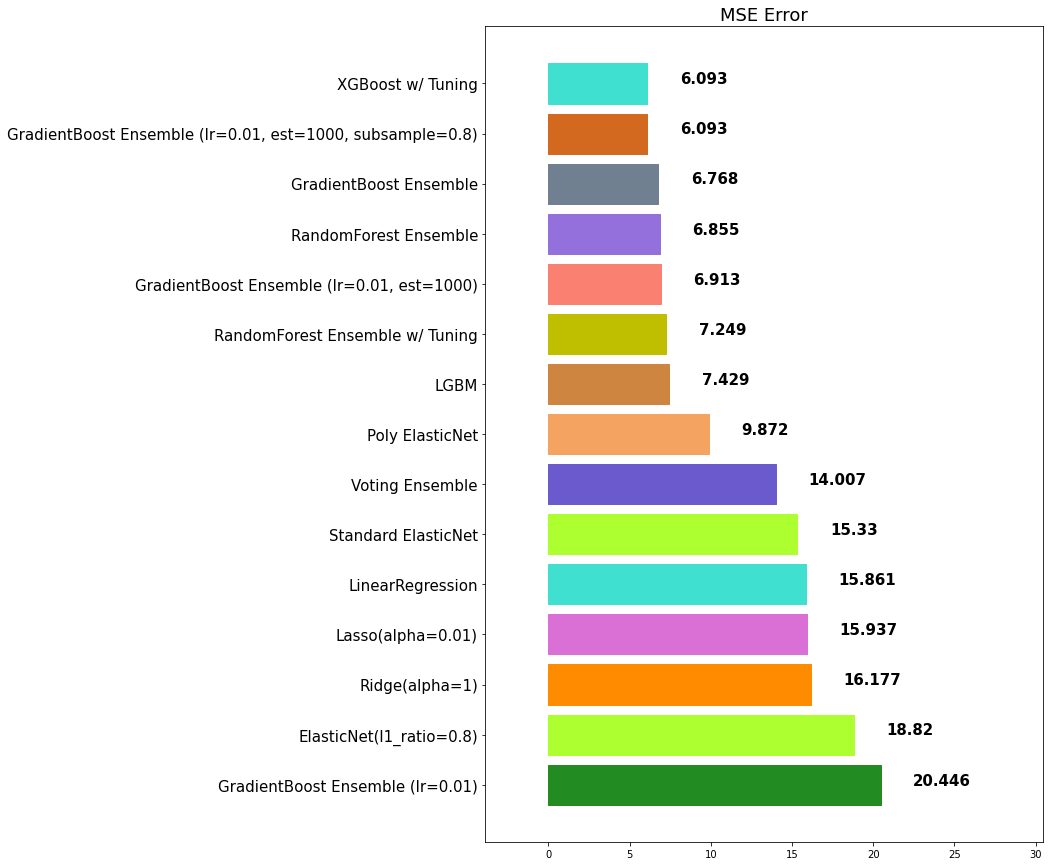

In [ ]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM', lgbm_pred, y_test)

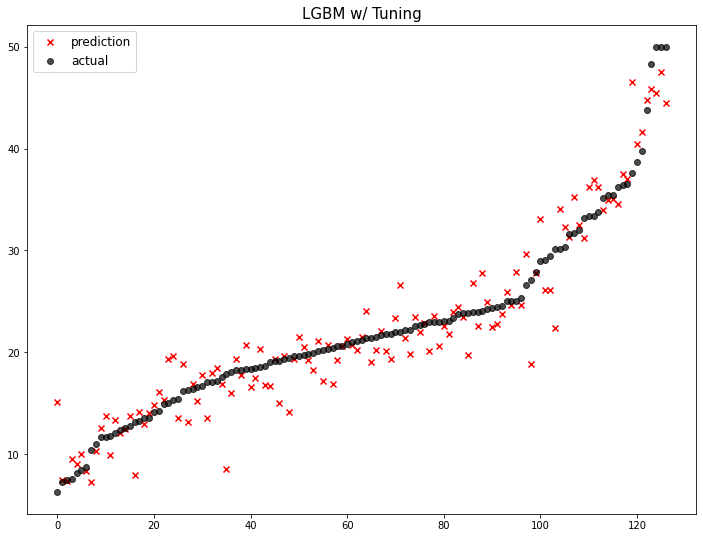

                                                model        mse
0                    GradientBoost Ensemble (lr=0.01)  20.445865
1                            ElasticNet(l1_ratio=0.8)  18.820036
2                                      Ridge(alpha=1)  16.177261
3                                   Lasso(alpha=0.01)  15.937363
4                                    LinearRegression  15.860720
5                                 Standard ElasticNet  15.329625
6                                     Voting Ensemble  14.006872
7                                     Poly ElasticNet   9.872081
8                                                LGBM   7.429085
9                                      LGBM w/ Tuning   7.318656
10                    RandomForest Ensemble w/ Tuning   7.249051
11         GradientBoost Ensemble (lr=0.01, est=1000)   6.912576
12                              RandomForest Ensemble   6.854852
13                             GradientBoost Ensemble   6.767948
14  GradientBoost Ensembl

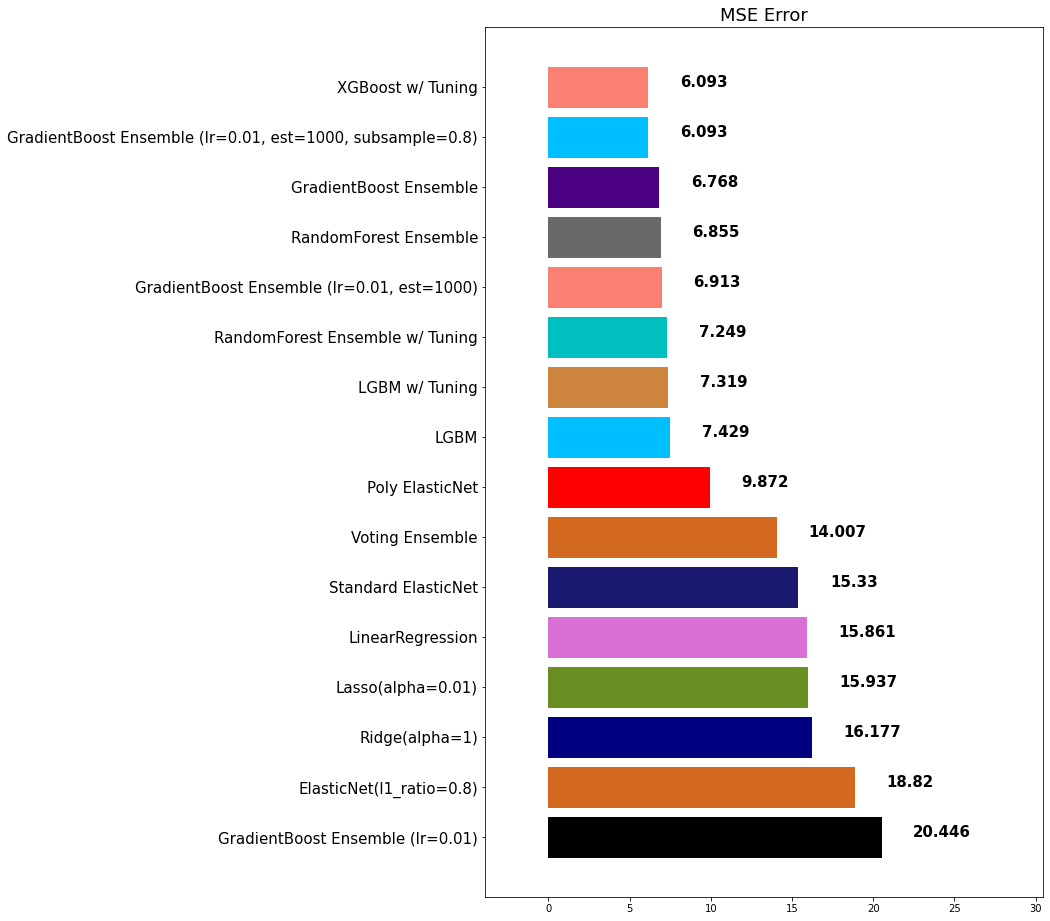

In [ ]:
lgbm = LGBMRegressor(random_state=42, learning_rate=0.01, n_estimators=2000, colsample_bytree=0.8, subsample=0.8, max_depth=7)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM w/ Tuning', lgbm_pred, y_test)

In [ ]:
# Stacking
from sklearn.ensemble import StackingRegressor

In [ ]:
stack_models = [
                ('elasticnet', poly_pipeline),
                ('randomforest', rfr),
                ('gbr', gbr),
                ('lgbm', lgbm),]

In [ ]:
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)

[08:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


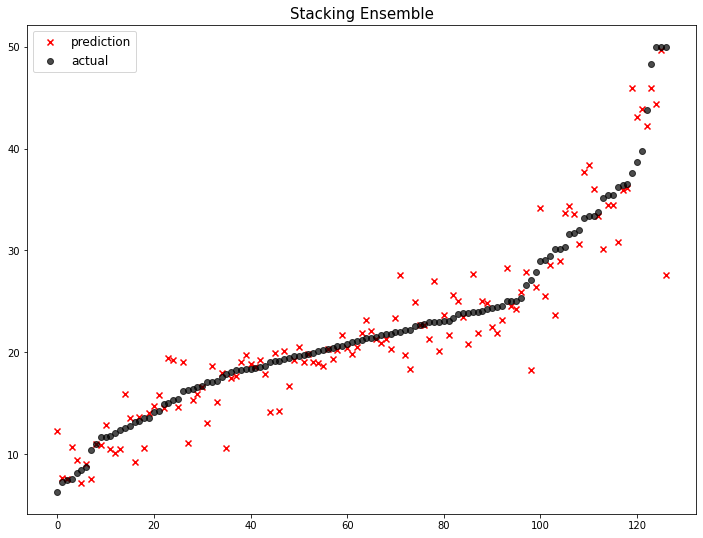

                                                model        mse
0                    GradientBoost Ensemble (lr=0.01)  20.445865
1                            ElasticNet(l1_ratio=0.8)  18.820036
2                                      Ridge(alpha=1)  16.177261
3                                   Lasso(alpha=0.01)  15.937363
4                                    LinearRegression  15.860720
5                                 Standard ElasticNet  15.329625
6                                     Voting Ensemble  14.006872
7                                   Stacking Ensemble  11.268520
8                                     Poly ElasticNet   9.872081
9                                                LGBM   7.429085
10                                     LGBM w/ Tuning   7.318656
11                    RandomForest Ensemble w/ Tuning   7.249051
12         GradientBoost Ensemble (lr=0.01, est=1000)   6.912576
13                              RandomForest Ensemble   6.854852
14                       

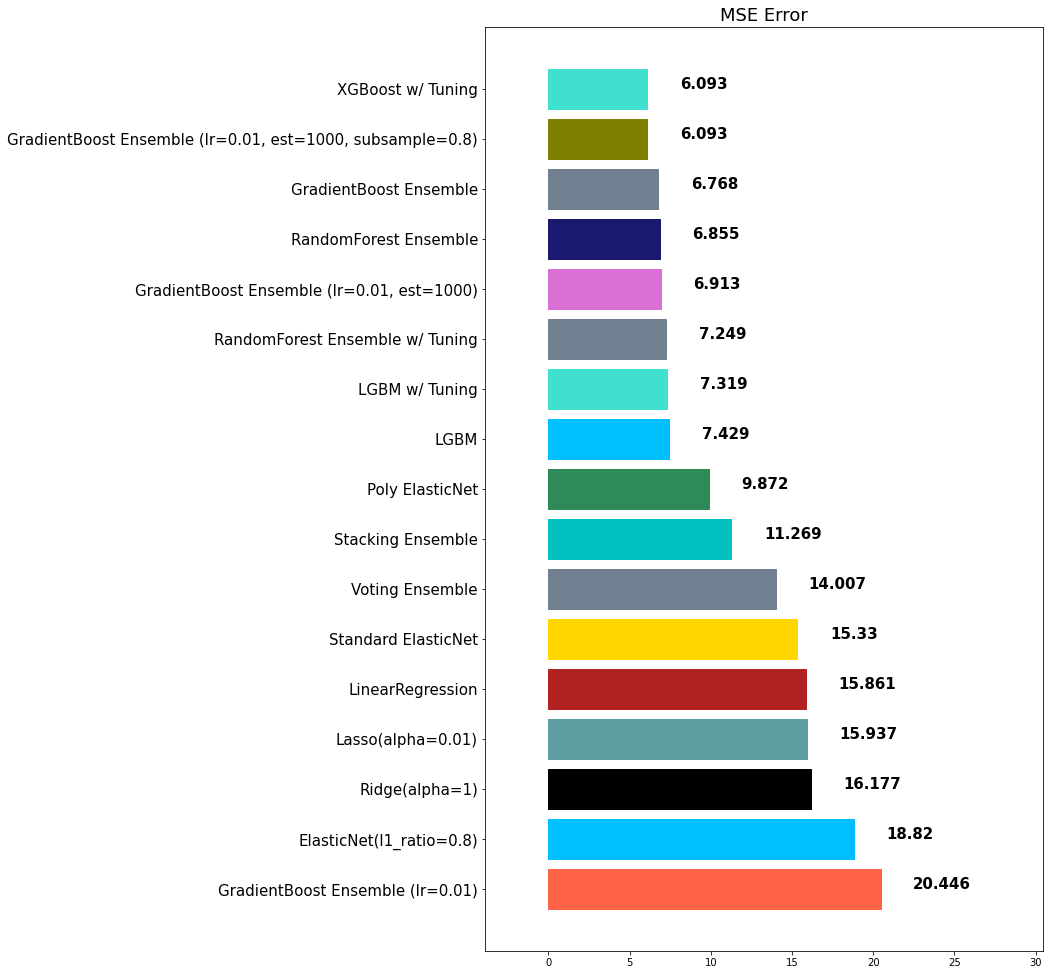

In [ ]:
stack_reg.fit(x_train, y_train)
stack_pred = stack_reg.predict(x_test)
mse_eval('Stacking Ensemble', stack_pred, y_test)

In [ ]:
# Cross Validation (K-fold Cross Validation)
from sklearn.model_selection import KFold

In [ ]:
n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = np.array(df.drop('MEDV', 1))
Y = np.array(df['MEDV'])

In [ ]:
lgbm_fold = LGBMRegressor(random_state=42)

In [ ]:
i = 1
total_error = 0
for train_index, test_index in kfold.split(X):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_test_fold)
    error = mean_squared_error(lgbm_pred_fold, y_test_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

Fold = 1, prediction score = 9.00
Fold = 2, prediction score = 15.73
Fold = 3, prediction score = 18.18
Fold = 4, prediction score = 43.95
Fold = 5, prediction score = 24.96
------------------------------
Average Error: 22.36329584390587


In [ ]:
params = {
    'n_estimators': [200, 500, 1000, 2000],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [6, 7, 8],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.8, 0.9, 1.0],
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clf = RandomizedSearchCV(LGBMRegressor(), params, random_state=42, cv=3, n_iter=25, scoring='neg_mean_squared_error')

In [ ]:
clf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silen...
                                           subsample_for_bin=200000,
                                           subsample_freq=0),
     

In [ ]:
clf.best_score_

-17.514813312098557

In [ ]:
clf.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 2000,
 'subsample': 0.9}

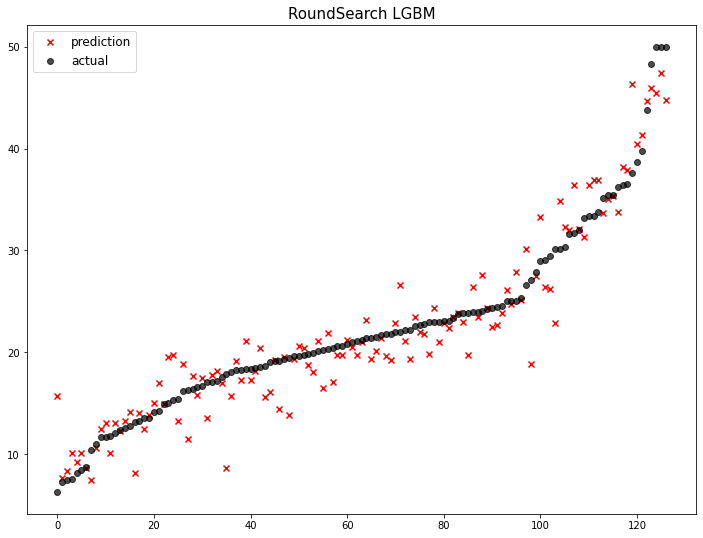

                                                model        mse
0                    GradientBoost Ensemble (lr=0.01)  20.445865
1                            ElasticNet(l1_ratio=0.8)  18.820036
2                                      Ridge(alpha=1)  16.177261
3                                   Lasso(alpha=0.01)  15.937363
4                                    LinearRegression  15.860720
5                                 Standard ElasticNet  15.329625
6                                     Voting Ensemble  14.006872
7                                   Stacking Ensemble  11.268520
8                                     Poly ElasticNet   9.872081
9                                    RoundSearch LGBM   7.829093
10                                               LGBM   7.429085
11                                     LGBM w/ Tuning   7.318656
12                    RandomForest Ensemble w/ Tuning   7.249051
13         GradientBoost Ensemble (lr=0.01, est=1000)   6.912576
14                       

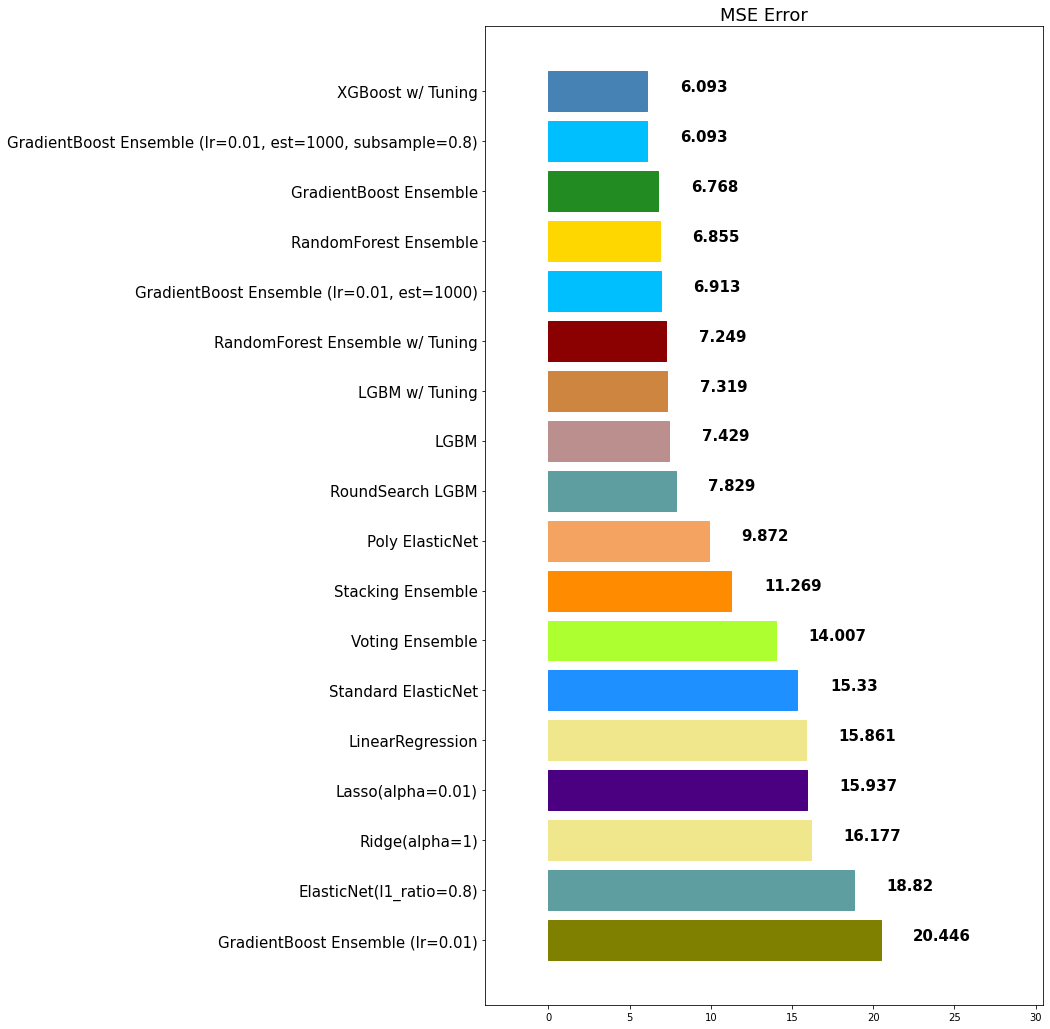

In [ ]:
lgbm_best = LGBMRegressor(n_estimators=200, subsample=0.9, max_depth=8, learning_rate=0.1, colsample_bytree=0.8)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('RoundSearch LGBM', lgbm_best_pred, y_test)

In [ ]:
# GridSearchCV
params = {
    'n_estimators': [500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [7, 8], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9,],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [7, 8], 'n_estimators': [5

In [ ]:
grid_search.best_score_

-17.48298749291287

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 8,
 'n_estimators': 500,
 'subsample': 0.8}

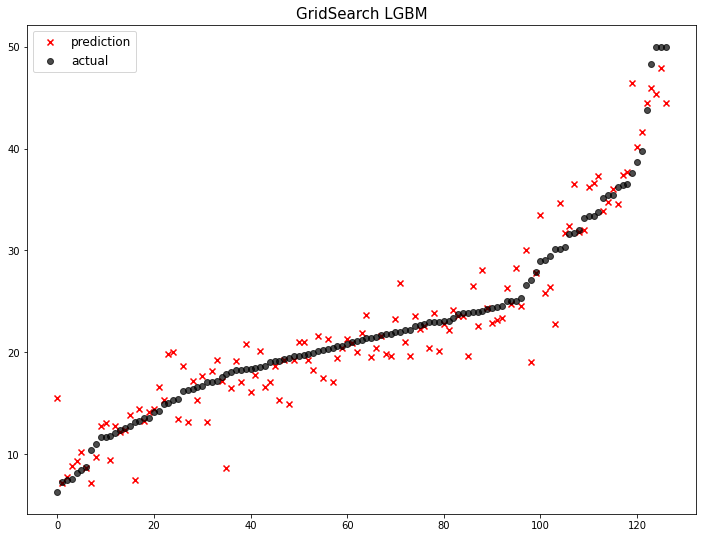

                                                model        mse
0                    GradientBoost Ensemble (lr=0.01)  20.445865
1                            ElasticNet(l1_ratio=0.8)  18.820036
2                                      Ridge(alpha=1)  16.177261
3                                   Lasso(alpha=0.01)  15.937363
4                                    LinearRegression  15.860720
5                                 Standard ElasticNet  15.329625
6                                     Voting Ensemble  14.006872
7                                   Stacking Ensemble  11.268520
8                                     Poly ElasticNet   9.872081
9                                    RoundSearch LGBM   7.829093
10                                    GridSearch LGBM   7.499842
11                                               LGBM   7.429085
12                                     LGBM w/ Tuning   7.318656
13                    RandomForest Ensemble w/ Tuning   7.249051
14         GradientBoost 

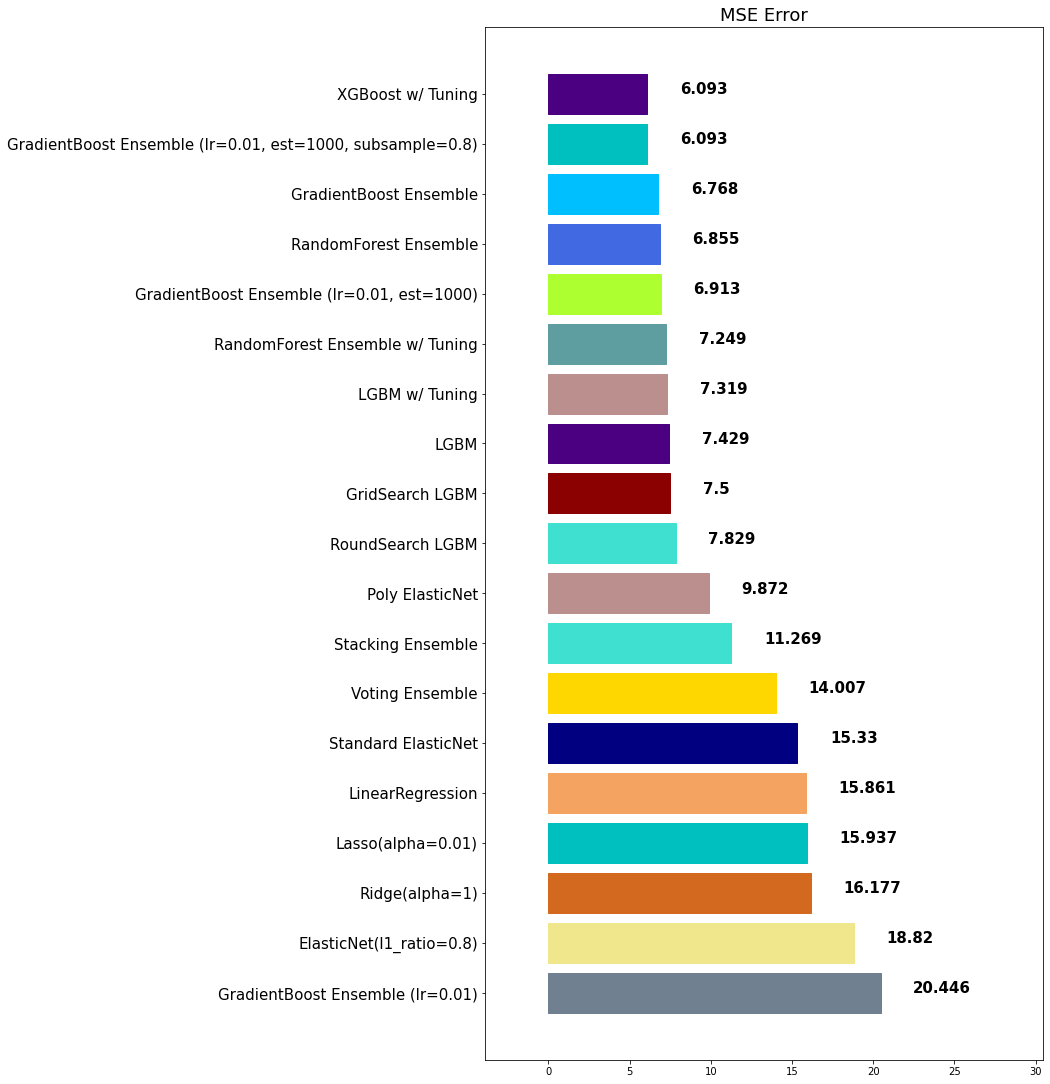

In [ ]:
lgbm_best = LGBMRegressor(n_estimators=500, subsample=0.8, max_depth=8, learning_rate=0.05, colsample_bytree=0.8)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('GridSearch LGBM', lgbm_best_pred, y_test)